In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\jimmy\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
file_path = 'C:/Users/jimmy/OneDrive/Desktop/combined_nfl_2013_2023.csv'
df = pd.read_csv(file_path)

C:\Users\jimmy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,16,17,22,23,24,27,29,33,40,42,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#Create an IsFieldGoal column
df['IsFieldGoal'] = df['Description'].apply(lambda x: 1 if 'FIELD GOAL IS GOOD' in str(x) else 0) 

In [6]:
#Create an IsPunt column
df['IsPunt'] = df['Description'].apply(lambda x: 1 if 'PUNTS' in str(x) else 0) 

In [7]:
#Create an IsScore column
df['IsScore'] = df['IsTouchdown'] | df['IsFieldGoal']
df['IsScore'] = df['IsScore'].astype(int)

In [8]:
# Create a Points column based on scoring plays
df['Points'] = 0  # Initialize with 0
df.loc[df['IsFieldGoal'] == 1, 'Points'] = 3  # Assign 3 points for field goals
df.loc[df['IsTouchdown'] == 1, 'Points'] = 6  # Assign 6 points for touchdowns

In [9]:
#Create a function to convert Minutes & Seconds to time remaining in a half (in seconds)
def calculate_time_remaining(row):
    if row['Quarter'] in [1, 3]:  
        return (row['Minute']*60 + 900) + row['Second']  
    elif row['Quarter'] in [2, 4]:  
        return (row['Minute'] * 60) + row['Second']  
    return None  # In case of any unexpected quarter values

# Apply the function 
df['TimeRemainingInHalf(s)'] = df.apply(calculate_time_remaining, axis=1)

In [10]:
df.drop(columns=['Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], inplace=True)

In [11]:
print(df.head())

       GameId  GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
0  2013090500  9/5/2013        1      15       0         DEN         BAL   
1  2013090500  9/5/2013        1      15       0         BAL         DEN   
2  2013090500  9/5/2013        1      14      14         BAL         DEN   
3  2013090500  9/5/2013        1      13      38         BAL         DEN   
4  2013090500  9/5/2013        1      13      18         BAL         DEN   

   Down  ToGo  YardLine  ...  IsPenaltyAccepted  PenaltyTeam  IsNoPlay  \
0     0     0        35  ...                  0          NaN         0   
1     1    10        20  ...                  0          NaN         0   
2     2    11        19  ...                  0          NaN         0   
3     3     8        22  ...                  0          BAL         0   
4     4     2        28  ...                  0          NaN         0   

                   PenaltyType PenaltyYards IsFieldGoal IsPunt IsScore  \
0                       

In [12]:
summary_stats = df.describe()
summary_stats

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,Column1,SeriesFirstDown,Column2,...,IsInterception,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsFieldGoal,IsPunt,IsScore,Points,TimeRemainingInHalf(s)
count,4.972770e+05,497277.000000,497277.000000,497277.000000,497277.000000,497277.000000,497277.000000,0.0,497277.000000,0.0,...,497277.000000,497277.000000,497276.000000,497277.000000,497275.000000,497277.000000,497277.000000,497277.000000,497277.000000,493924.000000
mean,2.018081e+09,2.573367,6.341190,27.304792,1.655721,7.126521,48.736207,NaN,0.366253,NaN,...,0.010155,0.079921,0.002389,0.001182,26.228672,0.018302,0.049069,0.048758,0.237640,804.833312
std,3.200243e+06,1.128428,4.668388,18.293704,1.180206,4.948101,27.828092,NaN,0.481780,NaN,...,0.109190,0.271172,0.048819,0.034366,14.524018,0.134040,0.216013,0.215361,1.097568,556.641108
min,2.013090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015113e+09,2.000000,2.000000,11.000000,1.000000,3.000000,27.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,274.000000
50%,2.018102e+09,3.000000,6.000000,27.000000,1.000000,9.000000,44.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,794.000000
75%,2.021093e+09,4.000000,10.000000,43.000000,2.000000,10.000000,71.000000,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1283.000000
max,2.024011e+09,5.000000,15.000000,59.000000,4.000000,48.000000,100.000000,NaN,1.000000,NaN,...,31.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,6.000000,1800.000000


In [13]:
shape = df.shape #497,277 data points w/ 47 variables
shape

(497277, 50)

In [14]:
df_cleaned = df[~df['PlayType'].isin(['2013', '0', 'UNDER CENTER', 'SHOTGUN', 'EXCEPTION',
                                                     'PENALTY', 'TIMEOUT', 'CLOCK STOP', ' NO PLAY',
                                                     'QB KNEEL'])] #Dropped PlayTypes that were not relevant
df_cleaned = df_cleaned[~df_cleaned['Down'].isin([0])] #Dropped down=0, which were timeouts/kickoff/end of quarter


In [15]:
Q1 = df_cleaned.loc[df_cleaned['Quarter']==1]
Q2 = df_cleaned.loc[df_cleaned['Quarter']==2] 
Q3 = df_cleaned.loc[df_cleaned['Quarter']==3] 
Q4 = df_cleaned.loc[df_cleaned['Quarter']==4]
df_cleaned['Quarter'] = df['Quarter'].replace(5, 'OT')
OT= df_cleaned.loc[df_cleaned['Quarter']=='OT']
print("1st Quarter Plays:",len(Q1))
print("2nd Quarter Plays:",len(Q2))
print("3rd Quarter Plays:",len(Q3))
print("4th Quarter Plays:",len(Q4))
print("Overtime Plays:",len(OT))
total_plays = len(Q1)+len(Q2)+len(Q3)+len(Q4)+len(OT)
total_plays

1st Quarter Plays: 92556
2nd Quarter Plays: 111160
3rd Quarter Plays: 93434
4th Quarter Plays: 107618
Overtime Plays: 2731


407499

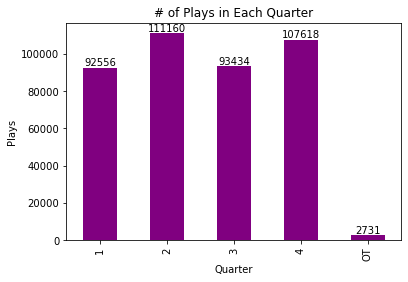

In [16]:
quarter_counts = df_cleaned['Quarter'].value_counts(sort=False)
quarter_counts.plot(kind='bar', color='purple')
plt.title('# of Plays in Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Plays')
for index, value in enumerate(quarter_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [17]:
FirstDown = df_cleaned.loc[df_cleaned['Down']==1] 
SecondDown = df_cleaned.loc[df_cleaned['Down']==2] 
ThirdDown = df_cleaned.loc[df_cleaned['Down']==3] 
FourthDown = df_cleaned.loc[df_cleaned['Down']==4] 
print("1st Down Plays:",len(FirstDown))
print("2nd Down Plays:",len(SecondDown))
print("3rd Down Plays:",len(ThirdDown))
print("4th Down Plays:",len(FourthDown))
total_plays = len(FirstDown)+len(SecondDown)+len(ThirdDown)+len(FourthDown)
total_plays

1st Down Plays: 163420
2nd Down Plays: 123220
3rd Down Plays: 78673
4th Down Plays: 42186


407499

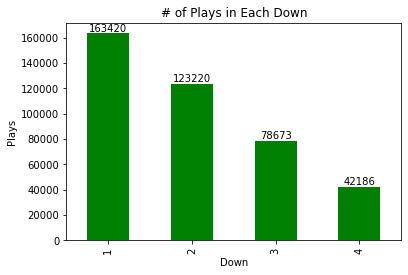

In [18]:
down_counts = df_cleaned['Down'].value_counts()
down_counts.plot(kind='bar', color='green')
plt.title('# of Plays in Each Down')
plt.xlabel('Down')
plt.ylabel('Plays')
for index, value in enumerate(down_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [19]:
Pass_Play = df_cleaned[df_cleaned['PlayType'].isin(['PASS','SACK'])] #216,570 passing plays
Run_Play = df_cleaned.loc[df_cleaned['IsRush']==1] #134,836 rushing plays
Punt_Play = df_cleaned.loc[df_cleaned['PlayType']=='PUNT'] #25,273 punts
FieldGoal = df_cleaned.loc[df_cleaned['PlayType']=='FIELD GOAL'] #10,795 FGs
ttl = len(Pass_Play) + len(Run_Play) + len(Punt_Play) + len(FieldGoal)
ttl

387481

In [20]:
Pass_Run_Ratio = len(Pass_Play)/(len(Pass_Play)+len(Run_Play)) 
print("The pass to rush ratio is:", Pass_Run_Ratio)

The pass to rush ratio is: 0.6162746359036817


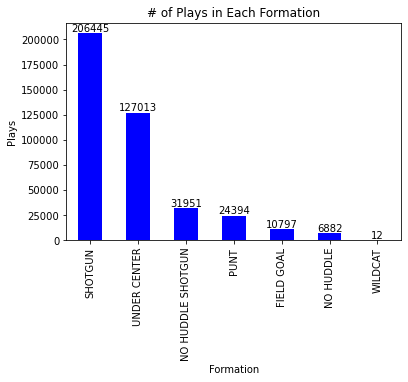

In [21]:
formation_counts = df_cleaned['Formation'].value_counts()
formation_counts.plot(kind='bar', color='blue')
plt.title('# of Plays in Each Formation')
plt.xlabel('Formation')
plt.ylabel('Plays')
for index, value in enumerate(formation_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

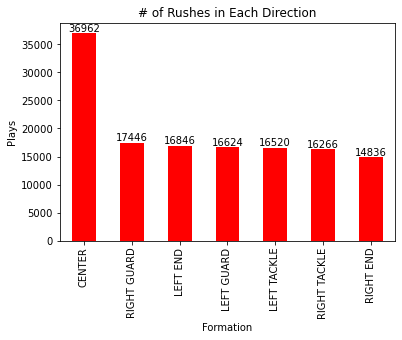

In [22]:
rush_direction_counts = df_cleaned['RushDirection'].value_counts()
rush_direction_counts.plot(kind='bar', color='red')
plt.title('# of Rushes in Each Direction')
plt.xlabel('Formation')
plt.ylabel('Plays')
for index, value in enumerate(rush_direction_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

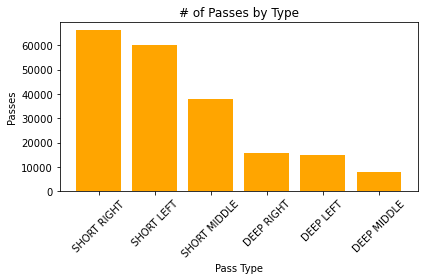

In [23]:
pass_type_counts = df_cleaned['PassType'].value_counts()
top_6_counts = pass_type_counts.head(6) #Only 6 pass types 
plt.bar(top_6_counts.index, top_6_counts.values, color='orange')
plt.title('# of Passes by Type')
plt.xlabel('Pass Type')
plt.ylabel('Passes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [24]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Define bin edges
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_cleaned['YardLineBin'] = pd.cut(df_cleaned['YardLine'], bins=bins, labels=labels, right = True)

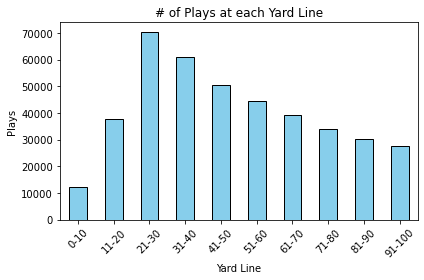

In [25]:

df_cleaned['YardLineBin'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('# of Plays at each Yard Line')
plt.xlabel('Yard Line')
plt.ylabel('Plays')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

In [26]:
avg_yards_gained = sum(df_cleaned['Yards'])/len(df_cleaned['Yards'])
avg_yards_gained = round(avg_yards_gained, 2)
print("The average play goes for", avg_yards_gained, "yards")

The average play goes for 5.04 yards


In [27]:
conditions = [
    (df_cleaned['Yards'] > 0),
    (df_cleaned['Yards'] == 0),
    (df_cleaned['Yards'] < 0)
]
choices = ['positive', 'zero', 'negative']
df_cleaned['yard_category'] = np.select(conditions, choices, default='unknown')

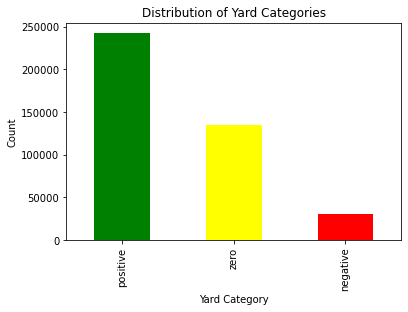

In [28]:
# Filter out the "unknown" category
df_cleaned = df_cleaned[df_cleaned['yard_category'] != 'unknown']

# Count occurrences of each category after filtering
category_counts = df_cleaned['yard_category'].value_counts()

category_counts.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Distribution of Yard Categories')
plt.xlabel('Yard Category')
plt.ylabel('Count')
plt.show()

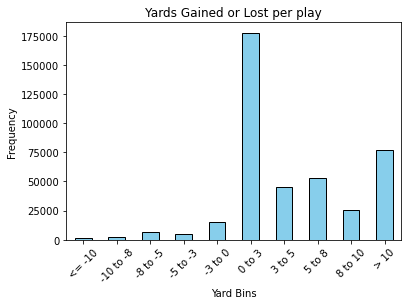

In [29]:
bin_edges = [-float('inf'), -10, -8, -5, -3, 0, 3, 5, 8, 10, float('inf')]
bin_labels = ['<= -10', '-10 to -8', '-8 to -5', '-5 to -3', '-3 to 0', '0 to 3', '3 to 5', '5 to 8', '8 to 10', '> 10']

# Create a new column for binned yards
df_cleaned['yard_bins'] = pd.cut(df_cleaned['Yards'], bins=bin_edges, labels=bin_labels, right=False)
bin_counts = df_cleaned['yard_bins'].value_counts().sort_index()

# Plot the histogram (bar graph) of the bins
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yards Gained or Lost per play')
plt.xlabel('Yard Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

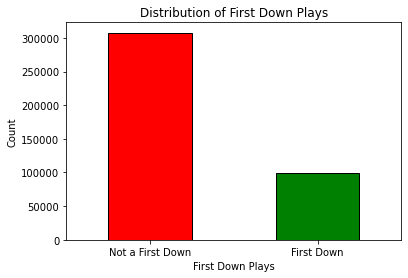

In [30]:
first_down_counts = df_cleaned['SeriesFirstDown'].value_counts()

# Plot the bar graph
first_down_counts.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Distribution of First Down Plays')
plt.xlabel('First Down Plays')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not a First Down', 'First Down'], rotation=0)
plt.show()

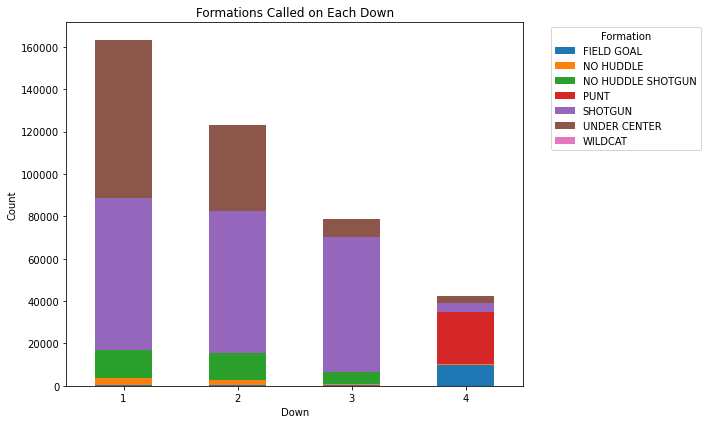

In [31]:
formation_counts = df_cleaned.groupby(['Down', 'Formation']).size().reset_index(name='Count')

formation_pivot = formation_counts.pivot(index='Down', columns='Formation', values='Count').fillna(0)

formation_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Formations Called on Each Down')
plt.xlabel('Down')
plt.ylabel('Count')
plt.legend(title='Formation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to make room for the legend

    # Show the plot
plt.show()

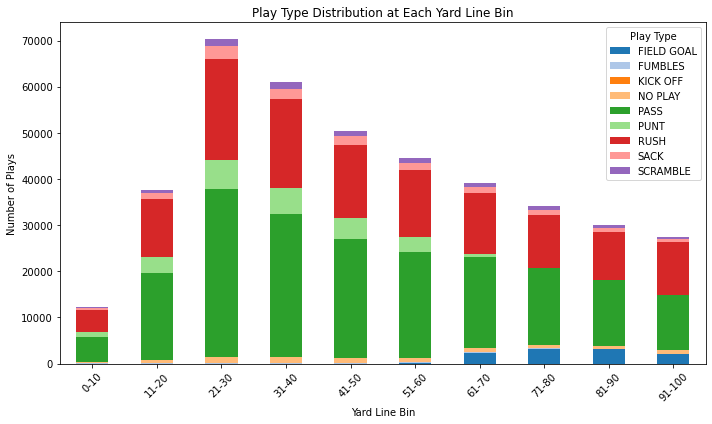

In [32]:
playtype_counts = df_cleaned.groupby(['YardLineBin', 'PlayType']).size().reset_index(name='Count')

# Pivot the data for easier plotting
playtype_pivot = playtype_counts.pivot(index='YardLineBin', columns='PlayType', values='Count').fillna(0)

# Plotting the data
playtype_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.tab20.colors)

# Adding titles and labels
plt.title('Play Type Distribution at Each Yard Line Bin')
plt.xlabel('Yard Line Bin')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Play Type')  # Add legend for play types
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()